In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
# импорт модулей
from  tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [ ]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по варианту
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 10000, 
                                                    train_size = 60000, 
                                                    random_state = 31)

In [ ]:
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


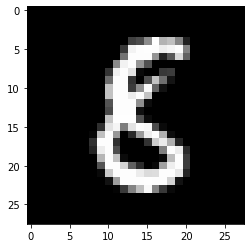

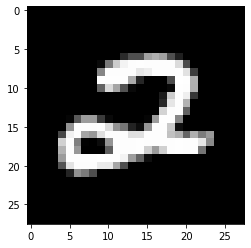

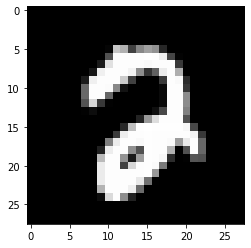

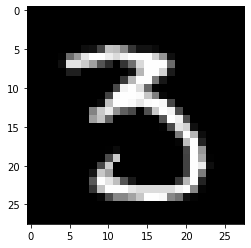

Marks: 8 2 2 3


In [ ]:
# вывод первых четырех изображений
for i in range(4):
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

# вывод меток для изображений
print('Marks:', *y_train[:4])

In [ ]:
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255

# вывод размерностей
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

Shape of transformed X train: (60000, 784)
Shape of transformed X test: (10000, 784)


In [ ]:
# переведем метки в one-hot
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y train:', y_test.shape)
num_classes = y_train.shape[1]

Shape of transformed y train: (60000, 10)
Shape of transformed y train: (10000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# однослойная НС
model_0h = Sequential()
model_0h.add(Dense(units=num_classes, input_dim=num_pixels, activation='softmax'))
model_0h.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# 1 скрытый слой со 100 нейронами
model_1h100 = Sequential()
model_1h100.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_1h100.add(Dense(units=num_classes, activation='softmax'))
model_1h100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# 1 скрытый слой с 300 нейронами
model_1h300 = Sequential()
model_1h300.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
model_1h300.add(Dense(units=num_classes, activation='softmax'))
model_1h300.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# 1 скрытый слой с 500 нейронами
model_1h500 = Sequential()
model_1h500.add(Dense(units=500, input_dim=num_pixels, activation='sigmoid'))
model_1h500.add(Dense(units=num_classes, activation='softmax'))
model_1h500.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# 1 скрытый слой с 1000 нейронами
model_1h1000 = Sequential()
model_1h1000.add(Dense(units=1000, input_dim=num_pixels, activation='sigmoid'))
model_1h1000.add(Dense(units=num_classes, activation='softmax'))
model_1h1000.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# 2 скрытых слоя со 100 и 50 нейронами соответственно
model_1h100_2h50 = Sequential()
model_1h100_2h50.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_1h100_2h50.add(Dense(units=50, activation='sigmoid'))
model_1h100_2h50.add(Dense(units=num_classes, activation='softmax'))
model_1h100_2h50.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# 2 скрытых слоя со 100 нейронами
model_1h100_2h100 = Sequential()
model_1h100_2h100.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_1h100_2h100.add(Dense(units=100, activation='sigmoid'))
model_1h100_2h100.add(Dense(units=num_classes, activation='softmax'))
model_1h100_2h100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# 2 скрытых слоя со 100 и 300 нейронами соответственно
model_1h100_2h300 = Sequential()
model_1h100_2h300.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_1h100_2h300.add(Dense(units=300, activation='sigmoid'))
model_1h100_2h300.add(Dense(units=num_classes, activation='softmax'))
model_1h100_2h300.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# вывод информации об архитектуре модели
print(model_1h100_2h300.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 300)               30300     
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 111,810
Trainable params: 111,810
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Обучаем модель и засекаем время обучения
import time
start = time.time()
H = model_1h100_2h300.fit(X_train, y_train, validation_split=0.1, epochs=100)
finish = time.time()
print(f'Время обучения: {round(finish - start, 2)} сек')

Epoch 1/100
1688/1688 [==============================] - 6s 3ms/step - loss: 2.2354 - accuracy: 0.2458 - val_loss: 2.1279 - val_accuracy: 0.5005
Epoch 2/100
1688/1688 [==============================] - 6s 3ms/step - loss: 1.8813 - accuracy: 0.5216 - val_loss: 1.5647 - val_accuracy: 0.6065
Epoch 3/100
1688/1688 [==============================] - 5s 3ms/step - loss: 1.2647 - accuracy: 0.6939 - val_loss: 1.0173 - val_accuracy: 0.7465
Epoch 4/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.8705 - accuracy: 0.7896 - val_loss: 0.7476 - val_accuracy: 0.7995
Epoch 5/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6714 - accuracy: 0.8303 - val_loss: 0.6043 - val_accuracy: 0.8435
Epoch 6/100
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5618 - accuracy: 0.8521 - val_loss: 0.5226 - val_accuracy: 0.8590
Epoch 7/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4953 - accuracy: 0.8678 - val_loss: 0.4691 - val_ac

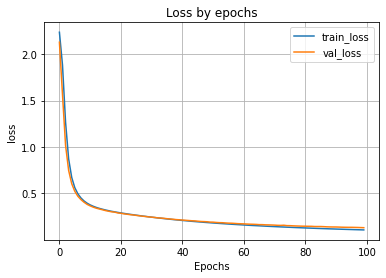

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()


In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h100_2h300.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1324 - accuracy: 0.9622
Loss on test data: 0.1324385553598404
Accuracy on test data: 0.9621999859809875


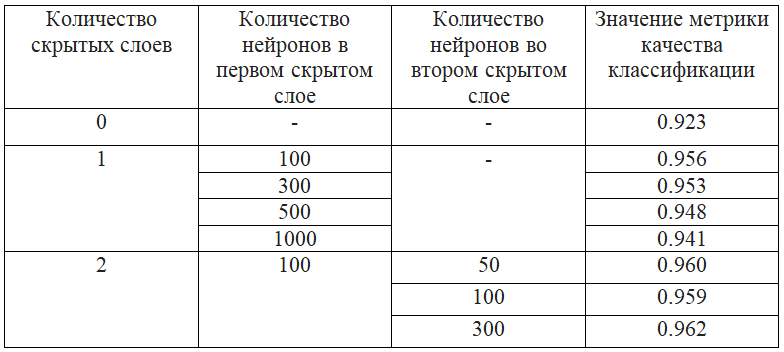

Модель без скрытых слоев дала наихудший результат, ее значение точности равно 0.923. 

По итогам четырех экспериментов с одним скрытым слоем лучше всего показала модель со 100 нейронами в скрытом слое. Ее точность равна 0.956.
После добавления второго скрытого слоя и экспериментов с ним, было получено, что наилучшим образом себя показала модель с 300 нейронами во втором скрытом слое. Ее точность равна 0.962.

Таким образом, получили следующую архитектуру: Трехслойная нейронная сеть с двумя скрытыми слоями по 100 и 300 нейронов.


In [ ]:
# сохранение модели на диск
model_1h100_2h300.save('best_model')

1/1 [==============================] - 0s 35ms/step
NN output: [[9.4137384e-08 9.6455085e-01 5.7129651e-05 3.5321628e-04 7.2827558e-03
  8.0120092e-04 2.0464692e-04 8.1922691e-03 1.6078008e-02 2.4799085e-03]]


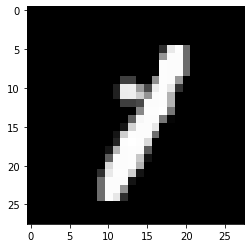

Real mark:  1
NN answer:  1 

1/1 [==============================] - 0s 29ms/step
NN output: [[1.2058325e-07 5.9399084e-04 1.3722259e-05 3.2748841e-03 7.1752154e-05
  3.7076167e-04 2.1111634e-07 1.7386094e-02 9.3170058e-04 9.7735673e-01]]


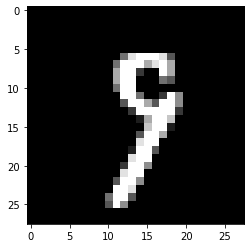

Real mark:  9
NN answer:  9 



In [ ]:
# вывод тестового изображения и результата распознавания
n = 31
for i in range(2):
  result = model_1h100_2h300.predict(X_test[n:n+1])
  print('NN output:', result)
  plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', str(np.argmax(y_test[n])))
  print('NN answer: ', str(np.argmax(result)), '\n')
  n += 1

Обе цифры были распознаны правильно, истинные метки совпадают с метками, которые дала нейронная сеть.

In [ ]:
# загрузка перевернутого собственного изображения
from PIL import Image
file_data = Image.open('test_number_rotated.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

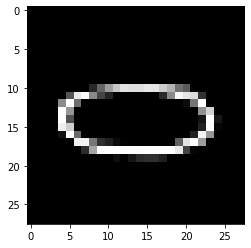

1/1 [==============================] - 0s 36ms/step
I think it's  0


In [ ]:
# вывод перевернутого собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
#предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model_1h100_2h300.predict(test_img)
print('I think it\'s ', np.argmax(result))

Так как перевернутый на 90 градусов ноль остается нулем, то нейронная сеть успешно справляется и с его распознаванием, что говорит о том, что модель была реализована удачно.